In [ ]:
import random, time, heapq, itertools
from collections import deque, defaultdict

# --- Problem Definition ---
GOAL = (1,2,3,4,5,6,7,8,0)
MOVES = {0:(1,3),1:(0,2,4),2:(1,5),3:(0,4,6),4:(1,3,5,7),5:(2,4,8),6:(3,7),7:(4,6,8),8:(5,7)}

def is_solvable(state):
    arr = [x for x in state if x != 0]
    inv = sum(1 for i in range(len(arr)) for j in range(i+1, len(arr)) if arr[i] > arr[j])
    return inv % 2 == 0

def neighbors(state):
    z = state.index(0)
    for nb in MOVES[z]:
        s = list(state)
        s[z], s[nb] = s[nb], s[z]
        yield tuple(s), 1

def reconstruct(parents, s):
    path = [s]
    while s in parents:
        s = parents[s]
        path.append(s)
    path.reverse()
    return path

# --- Algorithms ---

def bfs(start):
    t0 = time.perf_counter()
    if start == GOAL: return [start], 0, 0, 0.0
    Q = deque([start]); parents = {}; seen = {start}; expanded = 0
    while Q:
        s = Q.popleft(); expanded += 1
        for nxt, _ in neighbors(s):
            if nxt in seen: continue
            parents[nxt] = s; seen.add(nxt)
            if nxt == GOAL:
                path = reconstruct(parents, nxt)
                return path, len(path)-1, expanded, time.perf_counter() - t0
            Q.append(nxt)
    return [], -1, expanded, time.perf_counter() - t0

def dfs(start, limit=10000):
    t0 = time.perf_counter()
    if start == GOAL: return [start], 0, 0, 0.0
    stack = [start]; parents = {}; seen = {start}; expanded = 0
    while stack and expanded < limit:
        s = stack.pop(); expanded += 1
        for nxt, _ in neighbors(s):
            if nxt in seen: continue
            parents[nxt] = s; seen.add(nxt)
            if nxt == GOAL:
                path = reconstruct(parents, nxt)
                return path, len(path)-1, expanded, time.perf_counter() - t0
            stack.append(nxt)
    return [], -1, expanded, time.perf_counter() - t0

def ucs(start):
    t0 = time.perf_counter()
    g = defaultdict(lambda: float("inf")); g[start] = 0
    parents = {}; cnt = itertools.count()
    open_heap = [(0, next(cnt), start)]; closed = set(); expanded = 0
    while open_heap:
        cost, _, s = heapq.heappop(open_heap)
        if s in closed: continue
        closed.add(s); expanded += 1
        if s == GOAL:
            path = reconstruct(parents, s)
            return path, cost, expanded, time.perf_counter() - t0
        for nxt, c in neighbors(s):
            new_cost = g[s] + c
            if new_cost < g[nxt]:
                g[nxt] = new_cost; parents[nxt] = s
                heapq.heappush(open_heap, (new_cost, next(cnt), nxt))
    return [], -1, expanded, time.perf_counter() - t0

# --- Comparison Utility ---
def random_state():
    while True:
        s = tuple(random.sample(range(9), 9))
        if is_solvable(s): return s

def compare_algorithms(n=5):
    print(f"{'Algorithm':<10} | {'PathCost':<8} | {'Expanded':<9} | {'Time (s)':<8}")
    print("-"*45)
    for i in range(n):
        start = random_state()
        print(f"\n🔹 Random Start {i+1}: {start}")

        for name, algo in [("BFS", bfs), ("DFS", dfs), ("UCS", ucs)]:
            path, cost, exp, secs = algo(start)
            print(f"{name:<10} | {cost:<8} | {exp:<9} | {secs:.5f}")

# --- Run ---
if __name__ == "__main__":
    compare_algorithms()

Algorithm  | PathCost | Expanded  | Time (s)
---------------------------------------------

🔹 Random Start 1: (4, 3, 6, 5, 1, 2, 7, 0, 8)
BFS        | 17       | 10309     | 0.02388
DFS        | -1       | 10000     | 0.01983
UCS        | 17       | 15928     | 0.07805

🔹 Random Start 2: (1, 2, 5, 3, 8, 6, 4, 7, 0)
BFS        | 16       | 5633      | 0.01453
DFS        | -1       | 10000     | 0.02325
UCS        | 16       | 8854      | 0.04444

🔹 Random Start 3: (7, 2, 3, 6, 4, 1, 5, 0, 8)
BFS        | 17       | 10171     | 0.03623
DFS        | -1       | 10000     | 0.03201
UCS        | 17       | 15683     | 0.12036

🔹 Random Start 4: (0, 6, 4, 8, 2, 3, 1, 7, 5)
BFS        | 20       | 29366     | 0.10866
DFS        | -1       | 10000     | 0.03890
UCS        | 20       | 41831     | 0.28746

🔹 Random Start 5: (1, 6, 7, 5, 4, 8, 0, 3, 2)
BFS        | 22       | 63961     | 0.15235
DFS        | -1       | 10000     | 0.03976
UCS        | 22       | 85353     | 0.86052


State                     | Algo            | Cost  | Expanded  | Time(s) 
----------------------------------------------------------------------
(7, 3, 5, 8, 2, 1, 4, 6, 0) | UCS             | 18    | 25262     | 0.14663
(7, 3, 5, 8, 2, 1, 4, 6, 0) | A* (Manhattan)  | 18    | 142       | 0.00137
(7, 3, 5, 8, 2, 1, 4, 6, 0) | A* (LinearConflict) | 18    | 53        | 0.00105
(7, 4, 5, 0, 1, 6, 3, 8, 2) | UCS             | 21    | 62711     | 0.33576
(7, 4, 5, 0, 1, 6, 3, 8, 2) | A* (Manhattan)  | 21    | 420       | 0.00348
(7, 4, 5, 0, 1, 6, 3, 8, 2) | A* (LinearConflict) | 21    | 258       | 0.00532
(1, 7, 5, 0, 2, 3, 6, 8, 4) | UCS             | 23    | 123662    | 1.03033
(1, 7, 5, 0, 2, 3, 6, 8, 4) | A* (Manhattan)  | 23    | 1485      | 0.04362
(1, 7, 5, 0, 2, 3, 6, 8, 4) | A* (LinearConflict) | 23    | 824       | 0.05839
(4, 8, 1, 7, 2, 3, 0, 6, 5) | UCS             | 14    | 3407      | 0.04037
(4, 8, 1, 7, 2, 3, 0, 6, 5) | A* (Manhattan)  | 14    | 30        | 0.00051
(4, 8,

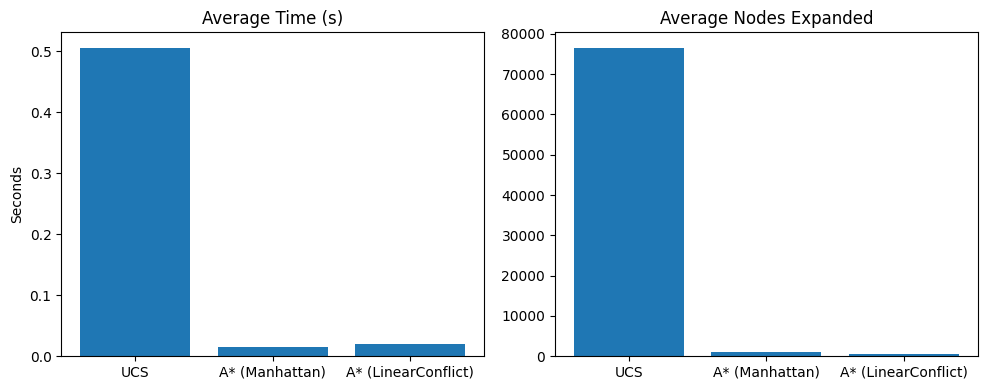


 Observation:
Manhattan and Linear Conflict heuristics are *admissible* (never overestimate actual cost).
Both are *consistent*, ensuring A* finds optimal paths faster than UCS.


In [ ]:
import random, heapq, itertools, time
from collections import defaultdict
import matplotlib.pyplot as plt

# ------------------ Problem Setup ------------------
GOAL = (1,2,3,4,5,6,7,8,0)
MOVES = {0:(1,3),1:(0,2,4),2:(1,5),3:(0,4,6),4:(1,3,5,7),
         5:(2,4,8),6:(3,7),7:(4,6,8),8:(5,7)}
goal_pos = {v:i for i,v in enumerate(GOAL)}

def is_solvable(state):
    arr = [x for x in state if x != 0]
    inv = sum(1 for i in range(len(arr)) for j in range(i+1, len(arr)) if arr[i] > arr[j])
    return inv % 2 == 0

def neighbors(state):
    z = state.index(0)
    for nb in MOVES[z]:
        s = list(state)
        s[z], s[nb] = s[nb], s[z]
        yield tuple(s), 1

def reconstruct(parents, s):
    path = [s]
    while s in parents:
        s = parents[s]
        path.append(s)
    path.reverse()
    return path

# ------------------ Heuristics ------------------
def manhattan(s):
    """Sum of Manhattan distances of tiles from their goal positions."""
    dist = 0
    for idx, val in enumerate(s):
        if val == 0: continue
        gi = goal_pos[val]
        r1,c1 = divmod(idx,3); r2,c2 = divmod(gi,3)
        dist += abs(r1-r2) + abs(c1-c2)
    return dist

def linear_conflict(s):
    """Manhattan + 2 * (# of linear conflicts)"""
    man = manhattan(s)
    conflicts = 0
    # Rows
    for r in range(3):
        row = s[3*r:3*r+3]
        for i in range(3):
            for j in range(i+1,3):
                if row[i] and row[j]:
                    gi, gj = goal_pos[row[i]], goal_pos[row[j]]
                    if gi//3 == gj//3 == r and gi > gj:
                        conflicts += 1
    # Columns
    for c in range(3):
        col = [s[c], s[c+3], s[c+6]]
        for i in range(3):
            for j in range(i+1,3):
                if col[i] and col[j]:
                    gi, gj = goal_pos[col[i]], goal_pos[col[j]]
                    if gi%3 == gj%3 == c and gi > gj:
                        conflicts += 1
    return man + 2*conflicts

# ------------------ Search Algorithms ------------------
def ucs(start):
    """Uniform Cost Search (for comparison)"""
    t0 = time.perf_counter()
    g = defaultdict(lambda: float('inf')); g[start] = 0
    parents = {}; cnt = itertools.count()
    open_heap = [(0, next(cnt), start)]
    closed = set(); expanded = 0
    while open_heap:
        cost, _, s = heapq.heappop(open_heap)
        if s in closed: continue
        closed.add(s); expanded += 1
        if s == GOAL:
            path = reconstruct(parents, s)
            return path, cost, expanded, time.perf_counter() - t0
        for nxt, c in neighbors(s):
            new_cost = g[s] + c
            if new_cost < g[nxt]:
                g[nxt] = new_cost
                parents[nxt] = s
                heapq.heappush(open_heap, (new_cost, next(cnt), nxt))
    return [], -1, expanded, time.perf_counter() - t0

def astar(start, heuristic):
    """A* Search using given heuristic function"""
    t0 = time.perf_counter()
    g = defaultdict(lambda: float('inf')); g[start] = 0
    parents = {}; cnt = itertools.count()
    open_heap = [(heuristic(start), next(cnt), start)]
    closed = set(); expanded = 0
    while open_heap:
        f, _, s = heapq.heappop(open_heap)
        if s in closed: continue
        closed.add(s); expanded += 1
        if s == GOAL:
            path = reconstruct(parents, s)
            return path, g[s], expanded, time.perf_counter() - t0
        for nxt, c in neighbors(s):
            tentative = g[s] + c
            if tentative < g[nxt]:
                g[nxt] = tentative
                parents[nxt] = s
                heapq.heappush(open_heap, (tentative + heuristic(nxt), next(cnt), nxt))
    return [], -1, expanded, time.perf_counter() - t0

# ------------------ Testing & Comparison ------------------
def random_state():
    while True:
        s = tuple(random.sample(range(9), 9))
        if is_solvable(s): return s

def compare_astar_vs_ucs(n=5):
    results = []
    print(f"{'State':<25} | {'Algo':<15} | {'Cost':<5} | {'Expanded':<9} | {'Time(s)':<8}")
    print("-"*70)
    for i in range(n):
        start = random_state()
        for name, algo in [('UCS', lambda s: ucs(s)),
                           ('A* (Manhattan)', lambda s: astar(s, manhattan)),
                           ('A* (LinearConflict)', lambda s: astar(s, linear_conflict))]:
            path, cost, exp, secs = algo(start)
            results.append((name, cost, exp, secs))
            print(f"{str(start):<25} | {name:<15} | {cost:<5} | {exp:<9} | {secs:.5f}")
    return results

# ------------------ Run and Plot ------------------
if __name__ == "__main__":
    results = compare_astar_vs_ucs(5)

    # Aggregate for plotting
    algos = ["UCS", "A* (Manhattan)", "A* (LinearConflict)"]
    avg_time = [sum(r[3] for r in results if r[0]==a)/len([r for r in results if r[0]==a]) for a in algos]
    avg_expanded = [sum(r[2] for r in results if r[0]==a)/len([r for r in results if r[0]==a]) for a in algos]

    # --- Plot comparison ---
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.bar(algos, avg_time)
    plt.title("Average Time (s)")
    plt.ylabel("Seconds")

    plt.subplot(1,2,2)
    plt.bar(algos, avg_expanded)
    plt.title("Average Nodes Expanded")

    plt.tight_layout()
    plt.show()

    print("\n Observation:")
    print("Manhattan and Linear Conflict heuristics are *admissible* (never overestimate actual cost).")
    print("Both are *consistent*, ensuring A* finds optimal paths faster than UCS.")